In [2]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten, BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
import glob
import warnings
import cv2
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


In [3]:
train_path=r"D:\programming\ML\project\train"
test_path=r"D:\programming\ML\project\test"

datadirectory="D:/programming/ML/project/train/"

In [4]:
classes=["angry", "disgust","fear","happy","neutral","sad","surprise"]

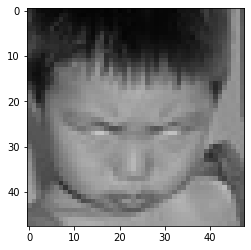

In [5]:
for category in classes:
    path=os.path.join(datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break



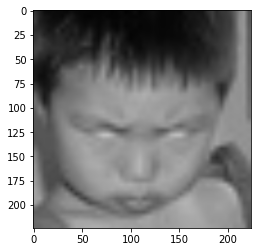

In [6]:
img_size=224
new_array=cv2.resize(img_array,(224,224))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
training_data=[]
def create_training_data():
    for category in classes:
        path=os.path.join(datadirectory,category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            try:
                 img_array=cv2.imread(os.path.join(path,img))
                 new_array=cv2.resize(img_array,(224,224))
                 training_data.append([new_array,class_num])
            except Exception as e:
                pass

           



In [8]:
create_training_data()

In [9]:
import random
random.shuffle(training_data)


In [10]:
X=[]
y=[]
for features,label in training_data:

    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1,224,224,3)
y=np.array(y)

In [11]:
y[10]

2

In [12]:
model=tf.keras.applications.MobileNetV2()

In [13]:
base_input=model.layers[0].input
base_output=model.layers[-2].output


In [14]:
final_output1=layers.Dense(128)(base_output)
final_output2=layers.Activation('relu')(final_output1)
final_output3=layers.Dense(64)(final_output2)
final_output4=layers.Activation('relu')(final_output3)
final_output=layers.Dense(7,activation='softmax')(final_output4)



In [15]:
new_model=keras.Model(inputs=base_input, outputs=final_output)
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [16]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

In [17]:
new_model.fit(X,y,epochs=5)

Epoch 1/5
 10/898 [..............................] - ETA: 1:01:03 - loss: 1.8587 - accuracy: 0.2500

KeyboardInterrupt: 

In [ ]:
new_model.save('v1e5.h5')

C:\Users\prati\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [27]:
final_model = keras.models.load_model(r"D:\programming\ML\project\v3e16.h5")

In [32]:
img=cv2.imread(r"D:\programming\ML\project\happy2.jpg")
img.shape 

(600, 398, 3)

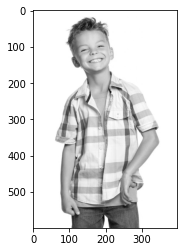

In [33]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [34]:
face_cascade = cv2.CascadeClassifier(r"D:\programming\ML\py-master\py-master\DataScience\CelebrityFaceRecognition\model\opencv\haarcascades\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"D:\programming\ML\py-master\py-master\DataScience\CelebrityFaceRecognition\model\opencv\haarcascades\haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[113,  64, 106, 106]], dtype=int32)

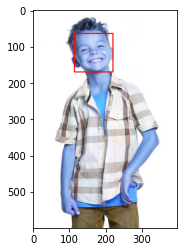

In [35]:
(x,y,w,h)=faces[0]
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

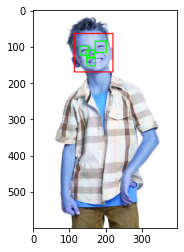

In [36]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [25]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

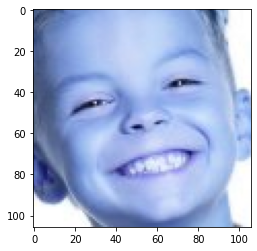

In [37]:
original_img=img=cv2.imread(r"D:\programming\ML\project\happy2.jpg")
cropped_img=get_cropped_image_if_2_eyes(r"D:\programming\ML\project\happy2.jpg")
plt.imshow(cropped_img)

In [38]:
final_img=cv2.resize(cropped_img,(224,224))
final_img=np.expand_dims(final_img,axis=0)


In [39]:
Predictions=final_model.predict(final_img)


In [40]:
Predictions[0]


array([3.2754719e-02, 2.6737565e-05, 4.1746744e-03, 9.5807821e-01,
       2.4903193e-03, 1.5253811e-03, 9.4994938e-04], dtype=float32)

In [43]:
classes[np.argmax(Predictions)]

'happy'